In [53]:
#Importing liabraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
data = pd.read_csv("C:/GitHub/ML_DS_projects/Incomplete Projects/Medical Cost/dataset/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
data = pd.DataFrame(data)

In [56]:
# Display basic information about the dataset
print("Dataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [57]:

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [58]:
#Null Values 
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Correlation heatmap:


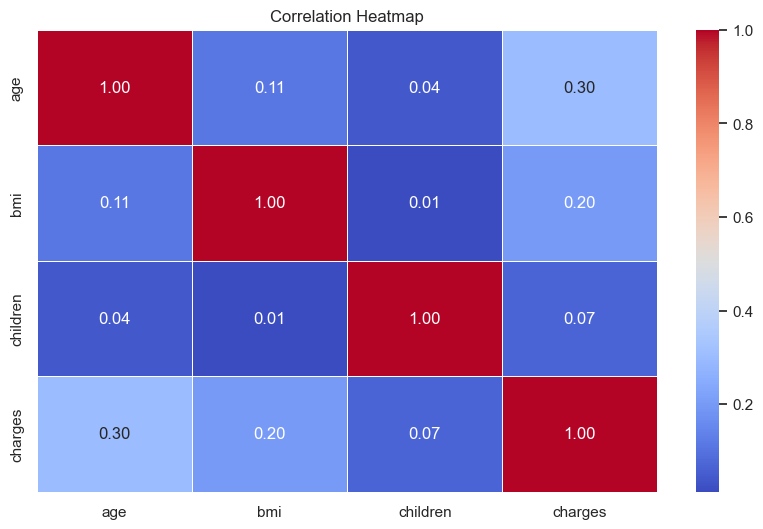

In [59]:
# Correlation heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


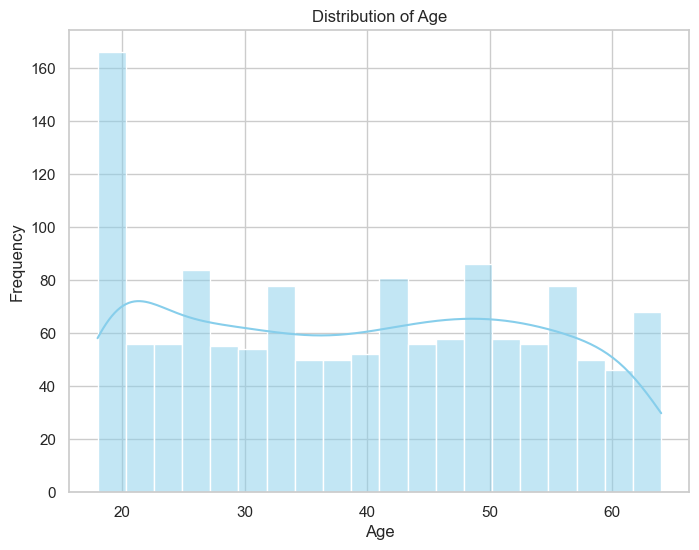

In [60]:
# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

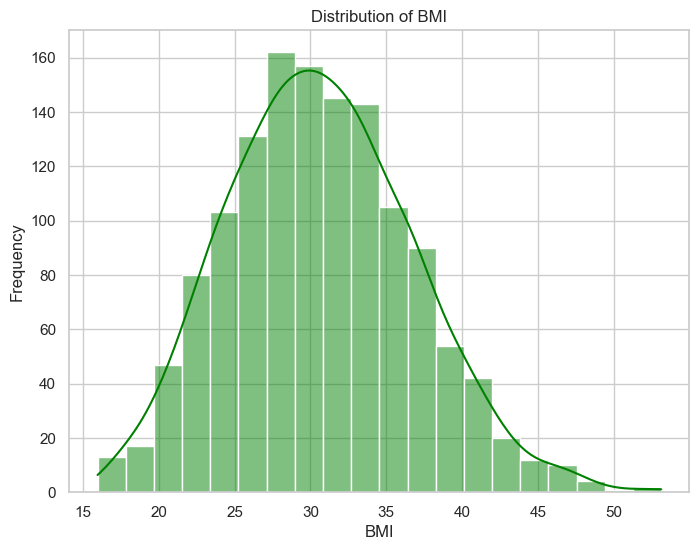

In [61]:
# Distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=20, kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()



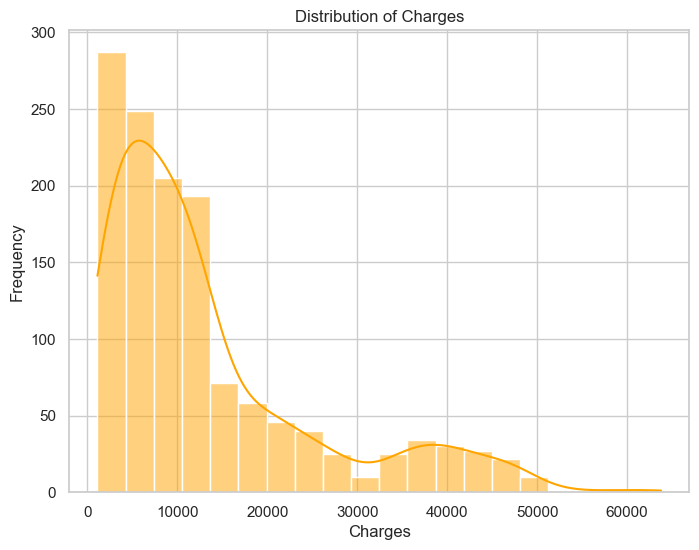

In [62]:
# Distribution of charges
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], bins=20, kde=True, color='orange')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()



c:\ProgramData\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Distribution of Charges')

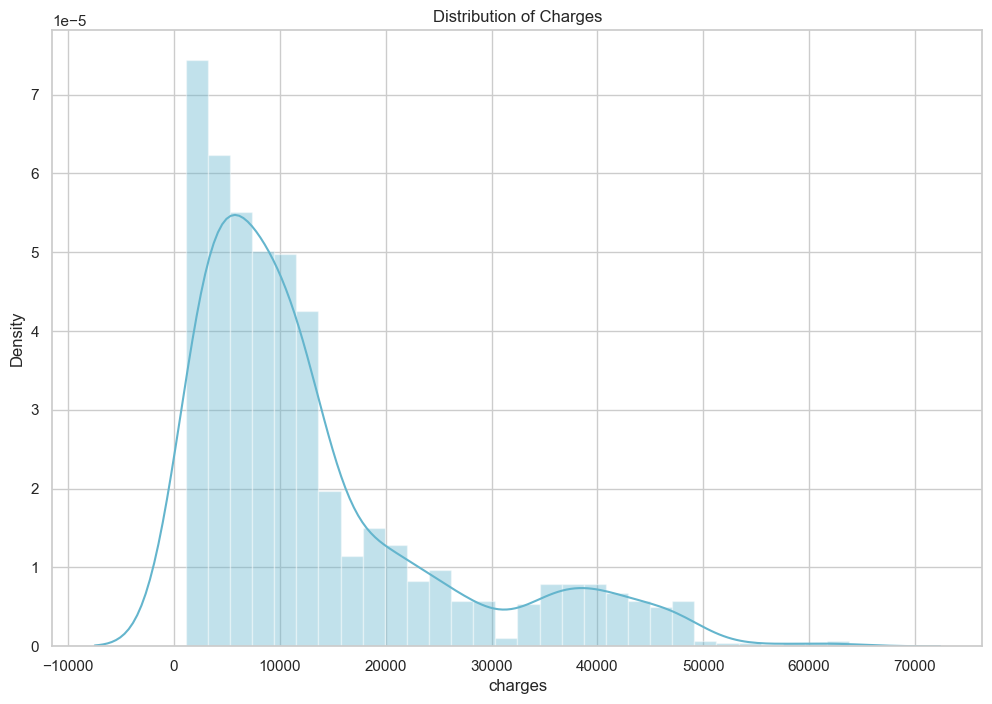

In [63]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

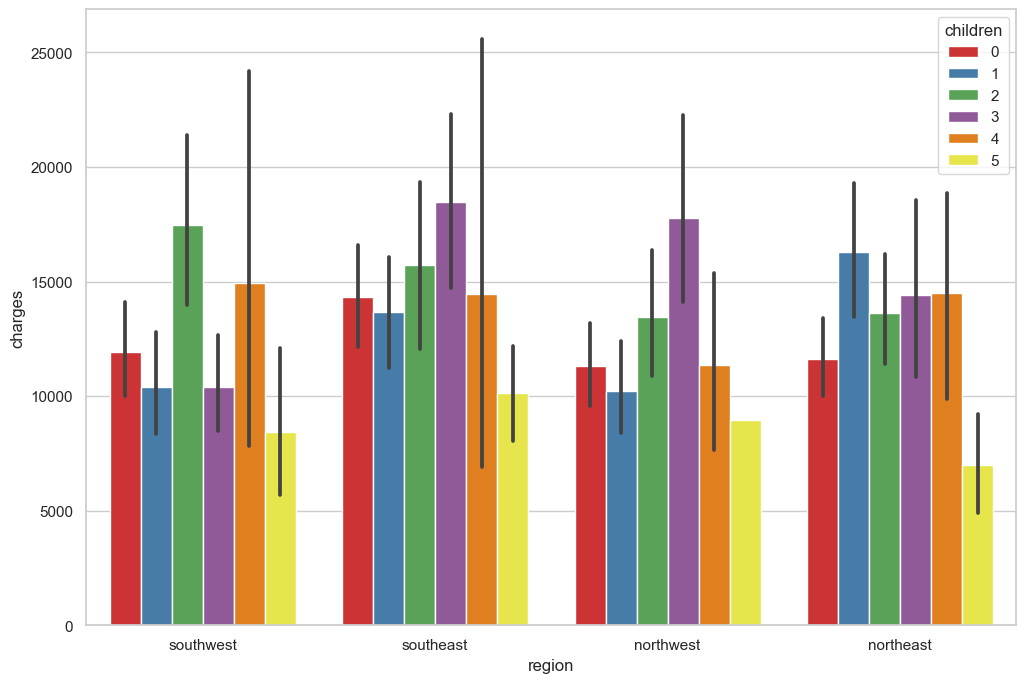

In [64]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=data, palette='Set1')

In [65]:
data_types = data.dtypes
# Filter out the categorical variables
categorical_vars = data_types[data_types == 'object'].index.tolist()
# List the categorical variables
print("Categorical Variables:")
for var in categorical_vars:
    print(var)

Categorical Variables:
sex
smoker
region


In [67]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [72]:
for column in categorical_vars:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'sex':
['female' 'male']
Unique values in column 'smoker':
['yes' 'no']
Unique values in column 'region':
['southwest' 'southeast' 'northwest' 'northeast']


In [68]:
#Spliting Dataset into train test val split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, train_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.2, random_state=42)


In [69]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
lr = LinearRegression()
lr.fit(x_train, y_train)

#Validae the model 
y_val_pred = lr.predict(x_val)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("Validation RMSE: ", val_rmse) 

# Testing the model
y_test_pred = lr.predict(x_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", test_rmse)

Validation RMSE:  6627.215081457633
Test RMSE: 6171.585197902114


In [70]:
#Saving model 
from joblib import dump

# Assuming lr is your trained linear regression model
dump(lr, 'insurance_linear_regression.joblib')


['insurance_linear_regression.joblib']

In [71]:
import pickle
with open('insurance_linear_regression.plk','wb') as f:
    pickle.dump(lr,f)